# First-Order Differential Equations with Python

First-order differential equations involve the first derivative of the unknown function. In this tutorial, we'll cover common methods for solving first-order ordinary differential equations (ODEs) and demonstrate how to solve them using Python.

---

## 1. What is a First-Order Differential Equation?

A **first-order differential equation** is an equation of the form:
$$
\frac{dy}{dx} = f(x, y)
$$
where $ y $ is the unknown function of $ x $.

---

## 2. Methods for Solving First-Order ODEs

### 2.1. Separation of Variables

#### **Definition**

If a first-order ODE can be written as:
$$
\frac{dy}{dx} = g(x)h(y)
$$
then we can separate the variables and integrate both sides:
$$
\int \frac{1}{h(y)} \, dy = \int g(x) \, dx
$$

#### **Example**

Solve $ \frac{dy}{dx} = xy $ with $ y(0) = 1 $:

$$
\frac{1}{y} \, dy = x \, dx
$$
Integrate both sides:
$$
\int \frac{1}{y} \, dy = \int x \, dx \implies \ln|y| = \frac{x^2}{2} + C
$$
Solve for $ y $:
$$
y = Ce^{x^2/2}
$$

#### **Python Implementation**

Matplotlib is building the font cache; this may take a moment.


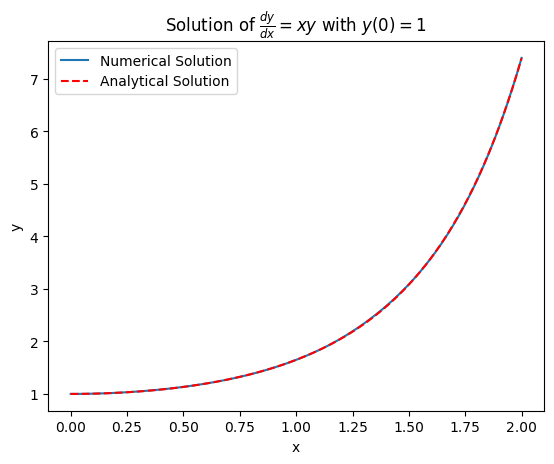

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def dydx(x, y):
    return x * y

x_span = (0, 2)
y0 = [1]
x_eval = np.linspace(0, 2, 100)
sol = solve_ivp(dydx, x_span, y0, t_eval=x_eval)

plt.plot(sol.t, sol.y[0], label='Numerical Solution')
plt.plot(x_eval, np.exp(x_eval**2 / 2), 'r--', label='Analytical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title(r"Solution of $\frac{dy}{dx} = xy$ with $y(0)=1$")
plt.show()

### 2.2. Integrating Factor Method

#### **Definition**

For a linear ODE of the form:
$$
\frac{dy}{dx} + P(x)y = Q(x)
$$
The integrating factor is:
$$
\mu(x) = e^{\int P(x)\,dx}
$$
Multiply both sides by $ \mu(x) $ and integrate.

#### **Example**

Solve $ \frac{dy}{dx} + 2y = e^{-x} $, $ y(0) = 0 $:

- $ P(x) = 2 $
- Integrating factor: $ \mu(x) = e^{2x} $
- Multiply both sides:
$$
e^{2x} \frac{dy}{dx} + 2e^{2x}y = e^{2x}e^{-x} = e^{x}
$$
$$
\frac{d}{dx}(e^{2x}y) = e^{x}
$$
Integrate:
$$
e^{2x}y = \int e^{x} dx = e^{x} + C
$$
$$
y = e^{-x} + Ce^{-2x}
$$
Apply $ y(0)=0 $: $ 0 = 1 + C \implies C = -1 $

So, $ y(x) = e^{-x} - e^{-2x} $

#### **Python Implementation**

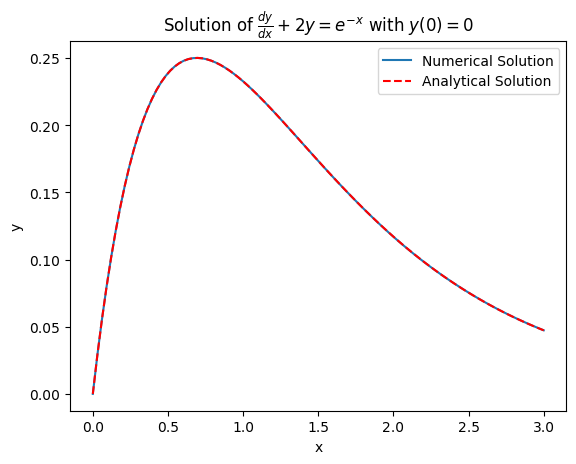

In [2]:
def dydx(x, y):
    return -2 * y + np.exp(-x)

x_span = (0, 3)
y0 = [0]
x_eval = np.linspace(0, 3, 100)
sol = solve_ivp(dydx, x_span, y0, t_eval=x_eval)

# Analytical solution
analytical = np.exp(-x_eval) - np.exp(-2*x_eval)

plt.plot(sol.t, sol.y[0], label='Numerical Solution')
plt.plot(x_eval, analytical, 'r--', label='Analytical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title(r"Solution of $\frac{dy}{dx} + 2y = e^{-x}$ with $y(0)=0$")
plt.show()

## 2.3. Exact Equations

#### **Definition**

An ODE of the form:
$$
M(x, y)dx + N(x, y)dy = 0
$$
is **exact** if:
$$
\frac{\partial M}{\partial y} = \frac{\partial N}{\partial x}
$$
If exact, there exists a function $ F(x, y) $ such that:
$$
\frac{\partial F}{\partial x} = M,\quad \frac{\partial F}{\partial y} = N
$$
and the solution is $ F(x, y) = C $.

#### **Example**

Solve $ (2xy + y^2)dx + (x^2 + 2xy)dy = 0 $:

- $ M(x, y) = 2xy + y^2 $, $ N(x, y) = x^2 + 2xy $
- $ \frac{\partial M}{\partial y} = 2x + 2y $
- $ \frac{\partial N}{\partial x} = 2x + 2y $
- Exact!

Integrate $ M $ with respect to $ x $:

$$
F(x, y) = \int (2xy + y^2) dx = x^2y + x y^2 + h(y)
$$
Differentiate with respect to $ y $:

$$
\frac{\partial F}{\partial y} = x^2 + 2xy + h'(y)
$$
Set equal to $ N $:

$$
x^2 + 2xy + h'(y) = x^2 + 2xy \implies h'(y) = 0 \implies h(y) = \text{const}
$$

So, the solution is $ x^2y + x y^2 = C $.

#### **Python Implementation**

Exact equations are generally solved symbolically. Here's how to do it with `sympy`:

In [3]:
from sympy import symbols, Function, Eq, dsolve

x, y = symbols('x y')
f = Function('f')(x)
ode = Eq(f.diff(x), - (x**2 + 2*x*f) / (2*x*f + f**2))
sol = dsolve(ode, f)
print(sol)

[Eq(f(x), -x/2 - sqrt(-3*x**2 + 2*x*exp(C1) + exp(2*C1))/2 + exp(C1)/2), Eq(f(x), -x/2 + sqrt(-3*x**2 + 2*x*exp(C1) + exp(2*C1))/2 + exp(C1)/2)]


## 3. Summary

- **Separation of variables**: For equations where variables can be separated.
- **Integrating factor**: For linear first-order ODEs.
- **Exact equations**: When the equation satisfies the exactness condition.

Python, with libraries such as `scipy` for numerical and `sympy` for symbolic solutions, enables us to solve and visualize first-order ODEs effectively.

---

# [Differential Equations Context](./README.md)